In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Imports downloaded athlete dataset from this link (https://www.kaggle.com/datasets/ziya07/athlete-injury-and-performance-dataset?resource=download)
file_path = r"C:\Users\Jackson Boyle\OneDrive\County Executive\Attachments\Documents\Spring 2025\Data Science 325\Boyle_ACLinjuries\athlete_dataset\collegiate_athlete_injury_dataset.csv"

# Loads the dataset into a dataframe
df = pd.read_csv(file_path)

print(df.head())
print(df.columns)


  Athlete_ID  Age  Gender  Height_cm  Weight_kg Position  Training_Intensity  \
0       A001   24  Female        195         99   Center                   2   
1       A002   21    Male        192         65  Forward                   8   
2       A003   22    Male        163         83    Guard                   8   
3       A004   24  Female        192         90    Guard                   1   
4       A005   20  Female        173         79   Center                   3   

   Training_Hours_Per_Week  Recovery_Days_Per_Week  Match_Count_Per_Week  \
0                       13                       2                     3   
1                       14                       1                     3   
2                        8                       2                     1   
3                       13                       1                     1   
4                        9                       1                     2   

   Rest_Between_Events_Days  Fatigue_Score  Performance_Score 

In [14]:
y = df['Injury_Indicator']
X = df.drop(columns=['Injury_Indicator'])

cat_features = ['Position']
hotEnc = OneHotEncoder

ord_features = ['Athlete_ID', 'Gender']
ordEnc = OrdinalEncoder

ct = ColumnTransformer([
    ('hot', hotEnc(), cat_features),
    ('ord', OrdinalEncoder(), ord_features),
    ], 
                       remainder='passthrough')

X_trans = ct.fit_transform(X)


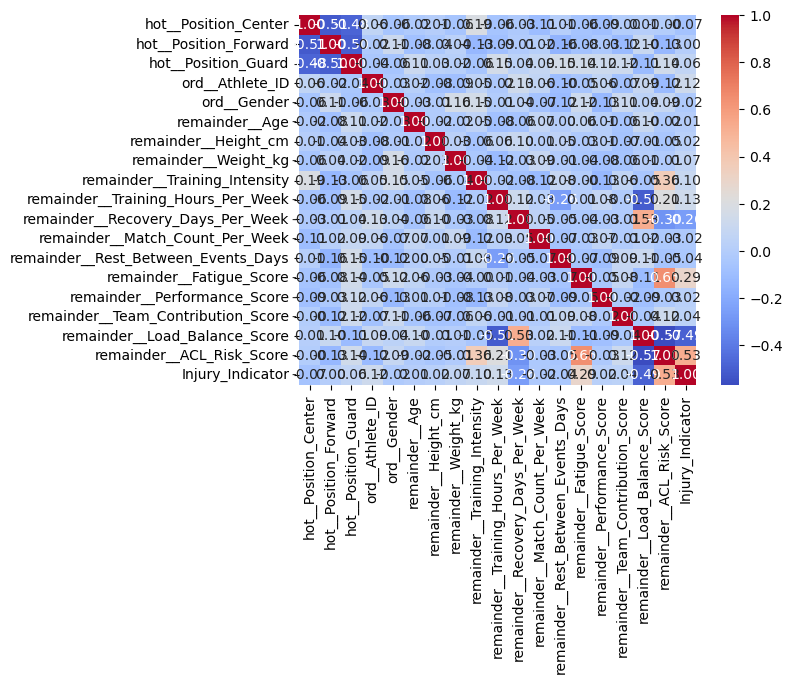

In [ ]:
X_trans_df = pd.DataFrame(X_trans, columns=ct.get_feature_names_out())

# Used Copilot to fix this part of the code
xy_df = pd.concat([X_trans_df, y.reset_index(drop=True)], axis=1)

corr = xy_df.corr()

sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()
